# The Sparks Foundation- Data Science & Business Analytics Intern¶

### Author:Umakant Kumar Yadav

### Simple Linear Regression

 we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

### Problem Statement

What will be predicted score if a student studies for 9.25 hrs/day?

### 1.Understanding the Data

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set()

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [39]:
#reading the data from provided link and loading into dataframe
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#cheking the dimension of dataframe
data.shape

(25, 2)

In [9]:
#cheking the data type of variable
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
#cheking any missing value in the dataframe using isnull() method.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 2.Data Visualization

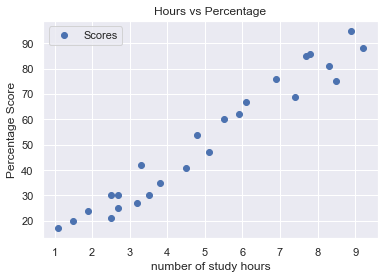

In [24]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

**Conclusion:From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [29]:
# we are using corr()  method to find the pairwise correlation of all columns
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **3.Preparing the data**

In [27]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [31]:
#Now let's take a look at train and test datasets individually
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### **4.Training the Algorithm**

In [32]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

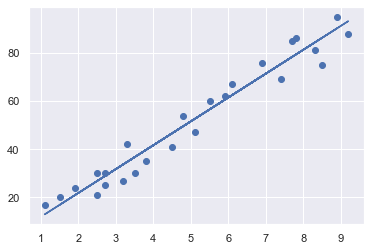

In [33]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **5.Making Predictions**

In [35]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
#predicting the test data and comparing with actual
predicted=regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df['error']=df['Actual']-df['Predicted']
df

,Actual,Predicted,error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


##### Problem statement solution 

What will be predicted score if a student studies for 9.25 hrs/day?

In [41]:
hours=np.array([9.25,1])
hours.reshape(-1,1)

array([[9.25],
       [1.  ]])

In [43]:
study=regressor.predict(hours.reshape(-1,1))
print("The predicted score for the student who studies 9.25hrs/day is ",study[0])

The predicted score for the student who studies 9.25hrs/day is  93.69173248737538


### **6.Evaluating the model**

In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
